## Missing values

Missing data, or Missing values, occur when __no data__ / __no value__ is stored for a certain observation within a variable. 

Missing data are a common occurrence both in data science competitions and in data in business settings, and can have a significant effect on the conclusions that can be drawn from the data. Incomplete data is an unavoidable problem in dealing with most data sources.

### Why is data missing?

The source of missing data can be very different and here are just a few examples:

- A value is missing because it was forgotten or lost or not stored properly
- For a certain observation, the value of the variable does not exist
- The value can't be known or identified

Imagine for example that the data comes from a survey, and the data are entered manually into an online form. The data entry could easily forget to complete a field in the form, and therefore, that value for that form would be missing.

The person being asked may not want to disclose the answer to one of the questions, for example, their income. That would be then a missing value for that person.

Sometimes, a certain feature can't be calculated for a specific individual. For example, in the variable 'total debt as percentage of total income' if the person has no income, then the total percentage of 0 does not exist. Therefore it will be a missing value.

Together with understanding the source of missing data, it is important to understand the mechanisms by which missing fields are introduced in a dataset. Depending on the mechanism, we may choose to process the missing values differently. In addition, by knowing the source of missing data, we may choose to take action to control that source, and decrease the number of missing data looking forward during data collection.


### Missing Data Mechanisms

There are 3 mechanisms that lead to missing data, 2 of them involve missing data randomly or almost-randomly, and the third one involves a systematic loss of data.

#### Missing Completely at Random, MCAR:

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. 
When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

If values for observations are missing completely at random, then disregarding those cases would not bias the inferences made.


#### Missing at Random, MAR: 

MAR occurs when there is a systematic relationship between the propensity of missing values and the observed data. In other words, the probability an observation being missing depends only on available information (other variables in the dataset). For example, if men are more likely to disclose their weight than women, weight is MAR. The weight information will be missing at random for those men and women that decided not to disclose their weight, but as men are more prone to disclose it, there will be more missing values for women than for men.

In a situation like the above, if we decide to proceed with the variable with missing values (in this case weight), we might benefit from including gender to control the bias in weight for the missing observations.

#### Missing Not at Random, MNAR: 

Missing of values is not at random (MNAR) if their being missing depends on information not recorded in the dataset. In other words, there is a mechanism or a reason why missing values are appearing in the dataset.

Examples:

MNAR would occur if people failed to fill in a depression survey because of their level of depression. Here, the missing of data is related to the outcome, depression.

When a financial company asks for bank and identity documents from customers in order to prevent identity fraud, typically, fraudsters impersonating someone else will not upload documents, because they don't have them, precisely because they are fraudsters. Therefore, there is a systematic relationship between the missing documents and the target we want to predict: fraud.

Understanding the mechanism by which data can be missing is important to decide which methods to use to handle the missing values. I will cover how to handle missing values in detail sections 5 and 6.



## Dataset: 

### Predicting Survival on the Titanic: understanding society behaviour and beliefs

To download the Titanic data, go ahead to the [Kaggle website](https://www.kaggle.com/c/titanic/data)

### Peer to peer lending: Finance


The Lending Club dataset contains complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. Features (aka variables) include credit scores, number of finance inquiries, address including zip codes and state, and collections among others. Collections indicates whether the customer has missed one or more payments and the team is trying to recover their money. The file is a matrix of about 890 thousand observations and 75 variables. More detail on this dataset can be found in [Kaggle's website](https://www.kaggle.com/wendykan/lending-club-loan-data)



In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [20]:
# let's load the titanic dataset

data = pd.read_csv('./../TitanicDataSet/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In python, the missing values are stored as NaN, see for example the first row for the variable Cabin.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
cabin_null     891 non-null int64
age_null       891 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 97.5+ KB


In [21]:
# you can determine the total number of missing values using
# the isnull method plus the sum method on the dataframe

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# alternatively, you can call the mean method after isnull
# to visualise the percentage of the dataset that 
# contains missing values for each variable

data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

We can see that there are missing data in the variables Age, Cabin (in which the passenger was travelling) and Embarked, which is the port from which the passenger got into the Titanic.

### Missing data Not At Random (MNAR): Systematic missing values

In this dataset, both the missing values of the variables Cabin and Age, were introduced systematically. For many of the people who did not survive, the **age** they had or the **cabin** they were staying in, could not be established. The people who survived could be asked for that information.

Can we infer this by looking at the data?

In a situation like this, we could expect a greater number of missing values for people who did not survive.

Let's have a look.

In [23]:
# we create a dummy variable that indicates whether the value
# of the variable cabin is missing

data['cabin_null'] = np.where(data.Cabin.isnull(), 1, 0)

# find percentage of null values
data.cabin_null.mean()

0.7710437710437711

As expected, this value coincides with the one observed above when we called the .isnull().mean() method on the dataset.

In [24]:
# and then we evaluate the mean of the missing values in
# cabin for the people who survived vs the non-survivors.

# group data by Survived vs Non-Survived
# and find nulls for cabin
data.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

We observe that the percentage of missing values is higher for people who did not survive (0.87), respect to people that survived (0.60).
This finding is aligned with our hypothesis that the data is missing because after the people died, the information could not be retrieved.

Having said this, to truly underpin whether the data is missing not at random, we would need to get extremely familiar with the way data was collected. Analysing datasets, can only point us in the right direction or help us build assumptions.

In [25]:
# we repeat the exercise for the variable age:
# First we create a dummy variable that indicates
# whether the value of the variable Age is missing

data['age_null'] = np.where(data.Age.isnull(), 1, 0)

# and then look at the mean in the different survival groups:
# there are more NaN for the people who did not survive
data.groupby(['Survived'])['age_null'].mean()

Survived
0    0.227687
1    0.152047
Name: age_null, dtype: float64

Again, we observe an increase in missing data for the people who did not survive the tragedy. The analysis therefore suggests: 

**There is a systematic loss of data: people who did not survive tend to have more information missing. Presumably, the method chosen to gather the information, contributes to the generation of these missing data.**

### Missing data Completely At Random (MCAR)

In the titanic dataset, there were also missing values for the variable Embarked, let's have a look.

In [26]:
# slice the dataframe to show only those observations
# with missing value for Embarked

data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,age_null
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,0


These 2 women were travelling together, Miss Icard was the maid of Mrs Stone.

A priori, there does not seem to be an indication that the missing information in the variable Embarked is depending on any other variable, and the fact that these women survived, means that they could have been asked for this information.

Very likely this missingness was generated at the time of building the dataset and therefore we could assume that it is completely random. We can assume that the probability of data being missing for these 2 women is the same as the probability for this variable to be missing for any other person. Of course this will be hard, if possible at all, to prove.

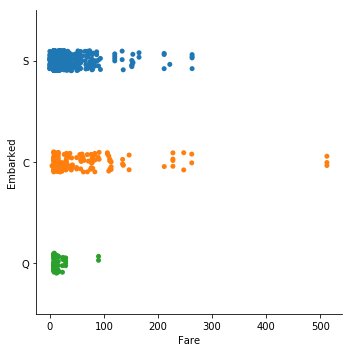

In [37]:
import seaborn as sns

sns.catplot(x="Fare",y="Embarked",data=data)

In [27]:

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,age_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0


### Missing data At Random (MAR)

For this example, I will use the Lending Club loan book. I will look specifically at the variables employer name (emp_title) and years in employment (emp_length), declared by the borrowers at the time of applying for a loan. The former refers to the name of the company for which the borrower works, the second one to how many years the borrower has worked for named company.

Here I will show an example, in which a data point missing in one variable (emp_title) depends on the value entered on the other variable (emp_lenght).

In [28]:
# let's load the columns of interest from the Lending Club loan book dataset

dataEmp=pd.read_csv('./../LendingClubLoanDataSet/loan.csv', usecols=['emp_title','emp_length'])
dataEmp.head()

,emp_title,emp_length
0,NaN,10+ years
1,Ryder,< 1 year
2,NaN,10+ years
3,AIR RESOURCES BOARD,10+ years
4,University Medical Group,1 year


In [29]:
# let's check the amount of missing data
dataEmp.isnull().mean()

emp_title     0.057993
emp_length    0.050514
dtype: float64

Around 6% of the observations contain missing data for employment title.

In [30]:
# let's peek at the different employer names

print('Number of different employer names: {}'.format(len(dataEmp.emp_title.unique())))
dataEmp.emp_title.unique()[0:20]

Number of different employer names: 299272


array([nan, 'Ryder', 'AIR RESOURCES BOARD', 'University Medical Group',
       'Veolia Transportaton', 'Southern Star Photography',
       'MKC Accounting ', 'Starbucks', 'Southwest Rural metro', 'UCLA',
       'Va. Dept of Conservation/Recreation', 'Target', 'SFMTA',
       'Internal revenue Service', "Chin's Restaurant", 'Duracell',
       'Connection Inspection', 'Network Interpreting Service',
       'Archdiocese of Galveston Houston', 'Osram Sylvania'], dtype=object)

In [31]:
# let's inspect the variable emp_length
dataEmp.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [32]:
# let's look at the percentage of borrowers within
# each label / category of the emp_length variable

dataEmp.emp_length.value_counts() / len(data)

10+ years    327.237935
2 years       88.518519
< 1 year      79.242424
3 years       78.592593
1 year        64.079686
5 years       62.518519
4 years       58.955107
7 years       50.049383
8 years       49.332211
6 years       48.204265
9 years       38.896745
Name: emp_length, dtype: float64

The label 'n/a', which in virtue could be similar to NaN, represents also around 5% of the dataset. So there could be a relationship between missing values in emp_title and 'n/a' in emp_length. Let's have a look.

In [33]:
# the variable emp_length has many categories. I will summarise it
# into 3 for simplicity:'0-10 years' or '10+ years' or 'n/a'

# let's build a dictionary to re-map emp_length to just 3 categories:

length_dict = {k:'0-10 years' for k in dataEmp.emp_length.unique()}
length_dict['10+ years']='10+ years'
length_dict['n/a']='n/a'

# let's look at the dictionary
length_dict

{'10+ years': '10+ years',
 '< 1 year': '0-10 years',
 '1 year': '0-10 years',
 '3 years': '0-10 years',
 '8 years': '0-10 years',
 '9 years': '0-10 years',
 '4 years': '0-10 years',
 '5 years': '0-10 years',
 '6 years': '0-10 years',
 '2 years': '0-10 years',
 '7 years': '0-10 years',
 nan: '0-10 years',
 'n/a': 'n/a'}

In [34]:
# let's re-map the emp_length

dataEmp['emp_length_redefined'] = dataEmp.emp_length.map(length_dict)
dataEmp.emp_length_redefined.unique()

array(['10+ years', '0-10 years'], dtype=object)

In [35]:
# let's calculate the proportion of working years
# with same employer for those who miss data on employer name

# number of borrowers for whom employer name is missing
value = len(dataEmp[dataEmp.emp_title.isnull()])

# % of borrowers for whom employer name is missing 
# within each category of employment length
dataEmp[dataEmp.emp_title.isnull()].groupby(['emp_length_redefined'])['emp_length'].count().sort_values() / value

emp_length_redefined
10+ years     0.054020
0-10 years    0.082507
Name: emp_length, dtype: float64

The majority of the missing values in the job title (emp_title) supplied by the borrower coincides with the label n/a of employment length. This supports the idea that the 2 variables are related.

In [36]:
# let's do the same for those bororwers who reported
# the employer name

# number of borrowers for whom employer name is present
value = len(dataEmp.dropna(subset=['emp_title']))

# % of borrowers within each category
dataEmp.dropna(subset=['emp_title']).groupby(['emp_length_redefined'])['emp_length'].count().sort_values() / value

emp_length_redefined
10+ years     0.345476
0-10 years    0.654059
Name: emp_length, dtype: float64

The number of borrowers who have reported an employer name and indicate n/a as employment length are minimal. Further supporting the idea that the missing values in employment length and employment length are related.

'n/a' in 'employment length' could be supplied by people who are retired, or students, or self-employed. In all of those cases there would not be a number of years at employment to provide, therefore the customer would enter 'n/a' and leave empty the form at the side of 'employer_name'.

In a scenario like this, a missing value in the variable emp_title depends on or is related to the 'n/a' label in the variable emp_length. And, this missing value nature is, in principle, independent of the variable we want to predict (in this case whether the borrower will repay their loan). How this will affect the predictions is unknown.